In [4]:
## load rtweet and tidyverse
library(rtweet)
suppressPackageStartupMessages(library(tidyverse))

In [5]:
## search for users using provided queries

breitbart <- search_users("breitbart", n = 1, verbose = FALSE)
thinkprogress <- search_users("thinkprogress", n = 1, verbose = FALSE)
reuters  <- search_users("reuterspolitics", n = 1, verbose = FALSE)

In [6]:
head(breitbart)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
457984599,Breitbart News,BreitbartNews,,"News, commentary, and destruction of the political/media establishment.",http://t.co/2sVbt3n6lO,FALSE,914005,147,8083,86569,951,2012-01-08 01:50:52,TRUE,http://t.co/2sVbt3n6lO,http://breitbart.com,en,https://pbs.twimg.com/profile_banners/457984599/1359997459,http://pbs.twimg.com/profile_background_images/640017675/ywh1wklfs11iwzuczgi7.jpeg,http://pbs.twimg.com/profile_images/949270171755077632/dw3M-58z_normal.jpg


In [7]:
head(thinkprogress)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
55355654,ThinkProgress,thinkprogress,"Washington, D.C.",Moving news forward. Founded in 2005. 0-time Fake News Award winner.,https://t.co/zvnMIuvszS,FALSE,850479,876,14224,116103,241,2009-07-09 20:42:08,TRUE,https://t.co/zvnMIuvszS,http://www.thinkprogress.org,en,https://pbs.twimg.com/profile_banners/55355654/1470649637,http://pbs.twimg.com/profile_background_images/365080126/tp-twitter.gif,http://pbs.twimg.com/profile_images/762609394265632768/H_UR_W7r_normal.jpg


In [8]:
head(reuters)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
25562002,Reuters Politics,ReutersPolitics,United States,"U.S. political coverage, breaking news and special investigations.",http://t.co/9WYK91SfY3,FALSE,249637,393,4620,70486,9,2009-03-20 19:42:26,TRUE,http://t.co/9WYK91SfY3,http://www.reuters.com/news/politics,en,https://pbs.twimg.com/profile_banners/25562002/1431460293,http://pbs.twimg.com/profile_background_images/378800000075181310/69725e6073c71f402b05297a48a00f07.png,http://pbs.twimg.com/profile_images/877265341398753280/V9xEHxMe_normal.jpg


In [9]:
## complete the code below
gop <- get_followers("BreitbartNews", n = 5000)
head(gop, 2)

user_id
779908557957242880
606122579


In [10]:
## complete the code below
dem <- get_followers("thinkprogress", n = 5000)
head(dem, 2)

user_id
915022243
132971860


In [11]:
## complete the code below
mod <- get_followers("ReutersPolitics", n = 5000)
head(mod, 2)

user_id
117207434
330343112


In [12]:
## complete the code below

## get gop users data
gop_data <- lookup_users(gop$user_id)

In [13]:
## complete the code below

## get dem users data
dem_data <- lookup_users(dem$user_id)

In [14]:
## complete the code below

## get mod users data
mod_data <- lookup_users(mod$user_id)

In [15]:
## complete the code below

## create "partisan" grouping variable
gop_data$partisan <- "gop"
dem_data$partisan <- "dem"
mod_data$partisan <- "mod"

## merge into single data frame
data <- bind_rows(gop_data, dem_data, mod_data)

In [16]:
## complete the code below

## PRINT: group by partisan and summarise integer vars
data %>%
    group_by(partisan) %>%
    summarize(friends = mean(friends_count, na.rm = TRUE),
               followers = mean(followers_count, na.rm = TRUE))

partisan,friends,followers
dem,1464.200,1297.8704
gop,754.339,847.9598
mod,1368.384,1474.6130


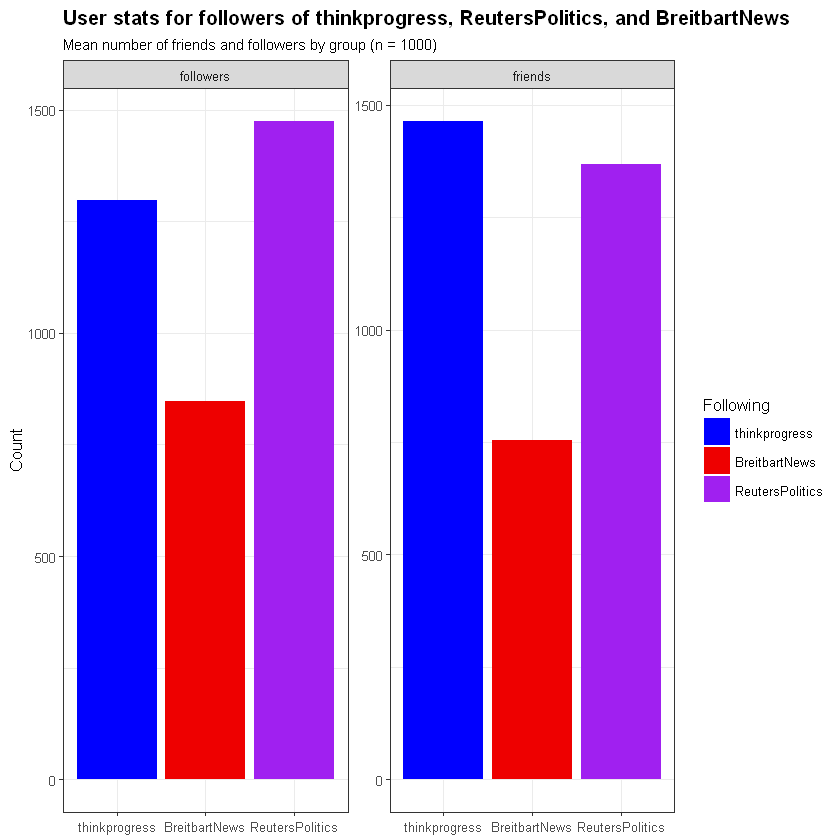

In [17]:
## complete the code below

## PLOT: group by partisan and summarise integer vars

data %>%
    mutate(Following = factor(partisan, labels = c("thinkprogress", "BreitbartNews", "ReutersPolitics"))) %>%
    group_by(Following) %>%
    summarize(
        friends = mean(friends_count, na.rm = TRUE),
        followers = mean(followers_count, na.rm = TRUE)) %>%
    gather(var, count, -Following) %>%
    ggplot(aes(x = Following, y = count, fill = Following)) + 
    geom_col() + 
    facet_wrap(~ var, ncol = 2, scales = "free_y") +
    theme_bw(base_size = 10) + 
    theme(plot.title = element_text(face = "bold")) + 
    scale_fill_manual(values = c(BreitbartNews = "red2", thinkprogress = "blue", ReutersPolitics = "purple")) + 
    labs(
            title = "User stats for followers of thinkprogress, ReutersPolitics, and BreitbartNews",
            subtitle = "Mean number of friends and followers by group (n = 1000)",
            x = NULL, y = "Count"
    )

In [18]:
## complete the code below


rsamp_uq <- function(..., n) {
    
    dots <- list(...)
    
    groups <- names(dots)
    
    user_ids <- lapply(dots, "[[", "user_id")
    
    
    for (i in seq_along(dots)) {
        
        ## filter out users found in other groups and protected users
        dots[[i]] <- filter(
            dots[[i]], 
            !user_id %in% unlist(user_ids[-i]) & !protected &verified
        )
        
        dots[[i]]$group <- groups[i]
    }
    
    sample_users <- function(x, n) x[x$user_id %in% sample(x$user_id, n), ]
        
    out <- lapply(dots, sample_users, n)
        
    bind_rows(out)
}
    
    
    
smps <- rsamp_uq(gop = gop_data, dem = dem_data, mod = mod_data, n = 5)

In [19]:
head(smps, 15)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,partisan,group
758565899032854528,Eko Putro Sandjojo,EkoSandjojo,Indonesia,#DanaDesa tahun 2018 sudah bisa dicairkan sejak 20 Januari. pekerjaan #DanaDesa wajib dilaksanakan secara #SwaKelola. 30% dari #DanaDesa wajib untuk upah.,https://t.co/tH0U9tzUTK,FALSE,58890,2559,25,...,2016-07-28 07:32:58,TRUE,https://t.co/tH0U9tzUTK,http://www.kemendesa.go.id,en-gb,https://pbs.twimg.com/profile_banners/758565899032854528/1518304289,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/831836886633046016/yDvvsSlv_normal.jpg,gop,gop
1209936918,One America News,OANN,,Your nation. Your news. #OANN,http://t.co/pWqf41e3no,FALSE,167969,74,1581,...,2013-02-22 22:24:39,TRUE,http://t.co/pWqf41e3no,http://oann.com,en,https://pbs.twimg.com/profile_banners/1209936918/1448043588,http://abs.twimg.com/images/themes/theme7/bg.gif,http://pbs.twimg.com/profile_images/579744264751448064/DH0xDrdO_normal.jpg,gop,gop
397348833,RomanaTomc,RomanaTomc,,Member of the European Parliament,https://t.co/DvVI7txjLa,FALSE,3268,917,87,...,2011-10-24 15:31:26,TRUE,https://t.co/DvVI7txjLa,http://www.romanatomc.si,en,https://pbs.twimg.com/profile_banners/397348833/1517232925,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/464513496101572608/ejfkO7ta_normal.jpeg,gop,gop
108677993,Jayme Fraser,JaymeKFraser,"Vale, OR and Missoula, MT",@MalheurNews & @propublica Local Reporting Network. 307 born. Closet nerd. Data geek. Conure cuddler. #RCTID #BAONPDX Once: @missoulian @houstonchron @umjschool,https://t.co/a7MHRDZfCe,FALSE,2559,2137,147,...,2010-01-26 18:23:32,TRUE,https://t.co/a7MHRDZfCe,http://jaymefraser.blog,en,https://pbs.twimg.com/profile_banners/108677993/1499127856,http://pbs.twimg.com/profile_background_images/445045530385580032/LeDQQr9x.jpeg,http://pbs.twimg.com/profile_images/882728623899156481/3oO4AuUy_normal.jpg,gop,gop
28053165,Ciara Riordan,ciarariordan,London,Senior Broadcast Journalist @bbcnews @bbcbreaking @BBCWorld via @bbcbreakfast @lbc @RTE @ABC_NewsRadio @newstalkFM @radiokerry: Irish!<U+2618><U+FE0F> https://t.co/lIKO3CbQCN,https://t.co/5YYREUiRR9,FALSE,1660,2380,57,...,2009-04-01 04:48:44,TRUE,https://t.co/5YYREUiRR9,https://vimeo.com/user30820966,en,https://pbs.twimg.com/profile_banners/28053165/1486325440,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/828335041231089666/FzhgF62Q_normal.jpg,gop,gop
37323374,Mara Montalbano,MaraMontalbano,New York City,Digital Reporter @InsideEdition Contributor @ThrillIst & @VinePair I blog @FastDietDiary,https://t.co/bpzuDVNl29,FALSE,1874,1302,37,...,2009-05-03 00:50:27,TRUE,https://t.co/bpzuDVNl29,http://maramontalbano.com,en,https://pbs.twimg.com/profile_banners/37323374/1460596763,http://abs.twimg.com/images/themes/theme3/bg.gif,http://pbs.twimg.com/profile_images/829937403192238080/VtbKrUDa_normal.jpg,dem,dem
17521783,Dan Simon,dansimoncnn,San Francisco,"CNN Correspondent based in San Francisco. Story teller, Tennis player; Nebraska Football Fan; gadget freak; history buff; U Penn Graduate; Steak lover",https://t.co/IaghNW8Xm2,FALSE,10091,6146,258,...,2008-11-20 20:48:34,TRUE,https://t.co/IaghNW8Xm2,http://www.cnn.com,en,https://pbs.twimg.com/profile_banners/17521783/1399146709,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/587762857481080833/zcjSrIK0_normal.jpg,dem,dem
25219709,Tanya Harrison,tanyaofmars,Toronto / Phoenix,"<f0><U+009F><U+0087><U+00A8><f0><U+009F><U+0087><U+00A6>Professional Martian. Director of Research @asunewspace, Web Editor @exploreplanets, current/former sci team @MarsRovers, @MarsCuriosity & Mars Recon Orbiter.",https://t.co/XCczQS8C6E,FALSE,16498,7032,713,...,2009-03-19 02:39:50,TRUE,https://t.co/XCczQS8C6E,h

In [20]:
nrow(smps)

[1] 15

In [21]:
followers <- lapply(smps$user_id, get_followers, verbose = FALSE)

In [22]:
smps$followers <- I(followers)
head(smps, 3)

user_id,name,screen_name,location,description,url,protected,followers_count,friends_count,listed_count,...,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,partisan,group,followers
758565899032854528,Eko Putro Sandjojo,EkoSandjojo,Indonesia,#DanaDesa tahun 2018 sudah bisa dicairkan sejak 20 Januari. pekerjaan #DanaDesa wajib dilaksanakan secara #SwaKelola. 30% dari #DanaDesa wajib untuk upah.,https://t.co/tH0U9tzUTK,FALSE,58890,2559,25,...,TRUE,https://t.co/tH0U9tzUTK,http://www.kemendesa.go.id,en-gb,https://pbs.twimg.com/profile_banners/758565899032854528/1518304289,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/831836886633046016/yDvvsSlv_normal.jpg,gop,gop,"c(""96282...."
1209936918,One America News,OANN,,Your nation. Your news. #OANN,http://t.co/pWqf41e3no,FALSE,167969,74,1581,...,TRUE,http://t.co/pWqf41e3no,http://oann.com,en,https://pbs.twimg.com/profile_banners/1209936918/1448043588,http://abs.twimg.com/images/themes/theme7/bg.gif,http://pbs.twimg.com/profile_images/579744264751448064/DH0xDrdO_normal.jpg,gop,gop,"c(""19930...."
397348833,RomanaTomc,RomanaTomc,,Member of the European Parliament,https://t.co/DvVI7txjLa,FALSE,3268,917,87,...,TRUE,https://t.co/DvVI7txjLa,http://www.romanatomc.si,en,https://pbs.twimg.com/profile_banners/397348833/1517232925,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/464513496101572608/ejfkO7ta_normal.jpeg,gop,gop,"c(""42882...."


In [23]:
get_top_3 <- function (x, n = 3){
    tbl <- sort(table(unlist(x)), decreasing = TRUE)
    
    if (length(tbl) > n) {
        tbl <- tbl[seq_len(n)]
    }    
        
    sns <- lookup_users(names(tbl))
    sns$screen_name
}

In [24]:
smps %>% 
    filter(length(smps$followers) >= 3) %>% 
    group_by(group) %>%
    summarise(
        freq = list(get_top_3(screen_name))
    )

group,freq
dem,"dansimoncnn , EdforTX , MaraMontalbano"
gop,"ciarariordan, EkoSandjojo , JaymeKFraser"
mod,"alisawiersema , arturaskerelis , AuthorKimberley"
